In [64]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [65]:
# read the image using OpenCV
image = cv2.imread("01.png")
# or you can use Pillow
image_show = Image.open("01.png")

In [66]:
# get the string
string = pytesseract.image_to_string(image)
# print it
print(string)

Full name: PETER ALLAN Noa>

Postal address: // DAWN V/EW PLACE , 7E PUNA
Phone numbers: Work: Home: 027 S552 444 7

Cell phone:
Emait: noacdties @ xtra. CO.NZ

Contact person (name and phone number if different from above):

We are legally required to provide a copy of your submission to the applicant. This includes your
personal details as provided on this submission form. We cannot withhold these details from an
applicant.

(& Please withhold personal details if a request is made for a copy of my submission under
the Local Government Official Information and Meetings Act 1987.

Full name:

My submission is on the following resource consent application(s):
Application number(s): = RM22-0100

Applicant's name: TPIL - Momentum Planning and Design Ltd.
Application site location: Te Puna Business Park, 297 Te Puna Station Road
Type of consent(s) applied for: Earthworks and Stormwater management

Closing date for receipt of submission: 30/10/23



In [67]:
# make a copy of this image to draw in
image_copy = image.copy()
# the target word to search for
target_word = ""
# get all data from the image
data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)

In [68]:
# get all occurences of the that word
word_occurences = [ i for i, word in enumerate(data["text"]) if word.lower() == target_word ]

In [69]:
word_occurences

[0,
 1,
 2,
 3,
 9,
 10,
 11,
 21,
 30,
 31,
 32,
 35,
 41,
 42,
 43,
 54,
 55,
 56,
 58,
 59,
 60,
 78,
 94,
 96,
 97,
 98,
 116,
 126,
 127,
 128,
 130,
 131,
 132,
 135,
 136,
 137,
 139,
 140,
 141,
 143,
 144,
 145,
 155,
 160,
 161,
 171,
 184,
 194,
 195,
 196]

In [70]:
for occ in word_occurences:
    # extract the width, height, top and left position for that detected word
    w = data["width"][occ]
    h = data["height"][occ]
    l = data["left"][occ]
    t = data["top"][occ]
    # define all the surrounding box points
    p1 = (l, t)
    p2 = (l + w, t)
    p3 = (l + w, t + h)
    p4 = (l, t + h)
    # draw the 4 lines (rectangular)
    image_copy = cv2.line(image_copy, p1, p2, color=(255, 0, 0), thickness=2)
    image_copy = cv2.line(image_copy, p2, p3, color=(255, 0, 0), thickness=2)
    image_copy = cv2.line(image_copy, p3, p4, color=(255, 0, 0), thickness=2)
    image_copy = cv2.line(image_copy, p4, p1, color=(255, 0, 0), thickness=2)

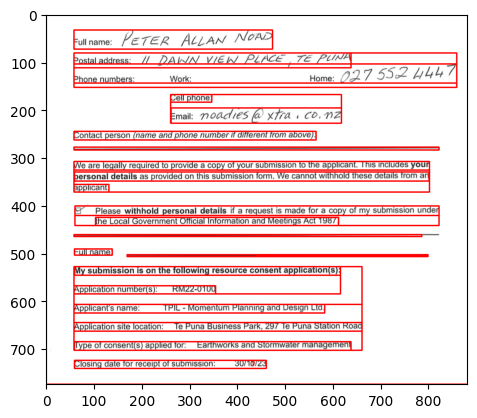

In [71]:
plt.imsave("all_dog_words.png", image_copy)
plt.imshow(image_copy)
plt.show()